In [4]:
!pip install -q mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 32.1 MB/s eta 0:00:00


(960, 960, 3)


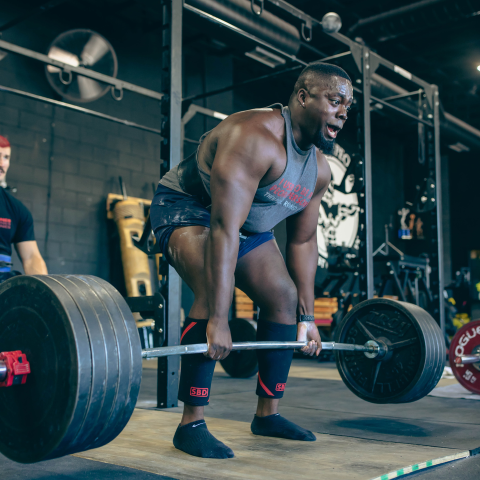

In [5]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np
import os


#for comfortable viewing only
def resize_and_show(image):
  DESIRED_HEIGHT = 480
  DESIRED_WIDTH = 480
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)


image_path = "/content/drive/MyDrive/deadlift_dataset/0(excellent)/Image-Pexels.webp"
img=0
if os.path.isfile(image_path):
    img = cv2.imread(image_path)
    print(img.shape)
    resize_and_show(img)

In [6]:
import mediapipe as mp
#model init
mp_pose = mp.solutions.pose
#results visualize init
mp_drawing = mp.solutions.drawing_utils
#styles for visulization init
mp_drawing_styles = mp.solutions.drawing_styles

# Пример нормализованных координат с origin'ом между бедрами
 - не подходит для оценки глубины

Nose coordinates: (0.709737241268158, 0.24469949305057526,-0.5858872532844543)
Pose landmarks of image:


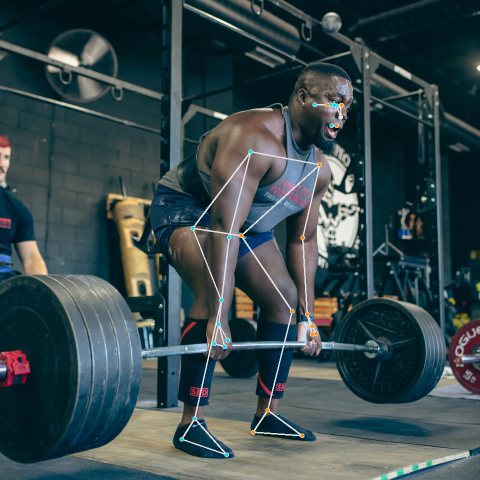

In [7]:
#model run and draw skeleton landmarks
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  #Convert the BGR image to RGB and process it with MediaPipe Pose.
  results = pose.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

  #Print nose landmark.
  image_hight, image_width, _ = img.shape
  print(
    f'Nose coordinates: ('
    f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x}, '
    f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y},'
    f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].z})'
  )

  #Draw pose landmarks.
  print(f'Pose landmarks of image:')
  annotated_image = img.copy()
  mp_drawing.draw_landmarks(
      annotated_image,
      results.pose_landmarks,
      mp_pose.POSE_CONNECTIONS,
      landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
  resize_and_show(annotated_image)

# Пример координат world_pose_landmark.
 - Плюсом выступает тот факт, что глубина здесь измерена более точно
 - Минус в том, что определение origin'а полностью переходит в зону ответственности модели

Nose world landmark:
x: 0.38253265619277954
y: -0.3352443277835846
z: -0.4611389636993408
visibility: 0.9998780488967896



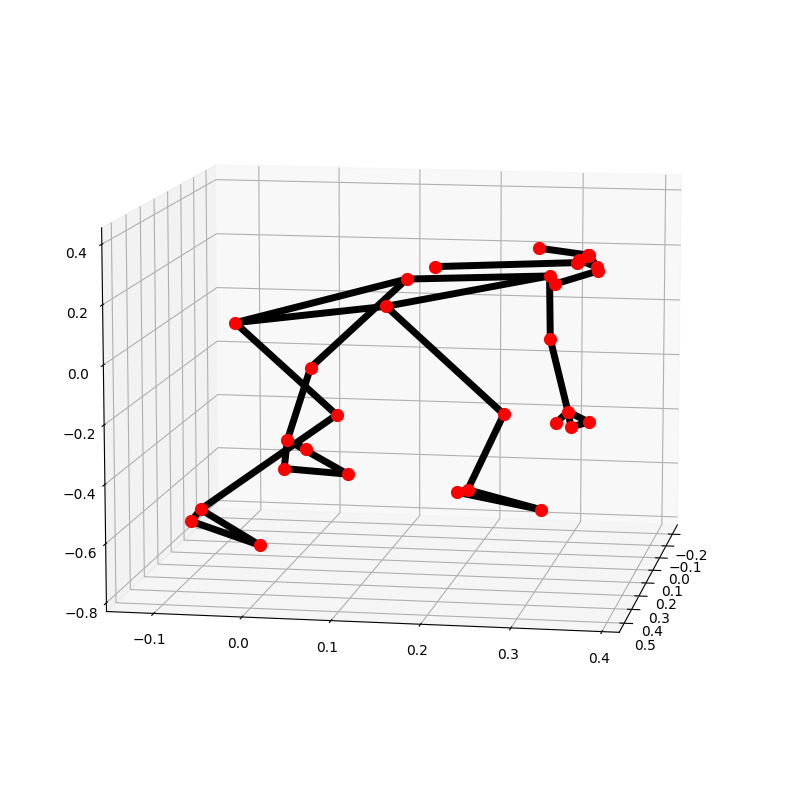

In [8]:
# run MediaPipe Pose and plot 3d pose world landmarks.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  results = pose.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

  # print the real-world 3D coordinates of nose in meters with the origin at
  # the center between hips.
  print('Nose world landmark:'),
  print(results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.NOSE])

  #plot pose world landmarks.
  mp_drawing.plot_landmarks(
      results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)